In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [20]:
df[' education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

In [23]:
df[' education'] = df[' education'].apply(lambda x: 1 if x in " Graduate" else 0 ).astype(int)

In [27]:
df[' self_employed'].value_counts()

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64

In [29]:
df[' self_employed'] = df[' self_employed'].apply(lambda x: 1 if x in " Yes" else 0 ).astype(int)

In [32]:
df[' loan_status'] = df[' loan_status'].apply(lambda x: 1 if x in " Approved" else 0 ).astype(int)

In [33]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1944,1945,0,1,1,4700000,17700000,16,887,1300000,4900000,13200000,6700000,1
4188,4189,4,1,0,5800000,18500000,16,436,1400000,5500000,17100000,6500000,0
129,130,3,1,0,400000,1200000,12,861,200000,600000,1100000,200000,1
461,462,5,1,1,1000000,2500000,14,885,2200000,100000,2300000,1100000,1
99,100,0,1,0,4400000,10800000,14,463,2400000,4800000,13800000,4700000,0


In [35]:
df.corr()[' loan_status']

loan_id                      0.017685
 no_of_dependents           -0.018114
 education                   0.004918
 self_employed               0.000345
 income_annum               -0.015189
 loan_amount                 0.016150
 loan_term                  -0.113036
 cibil_score                 0.770518
 residential_assets_value   -0.014367
 commercial_assets_value     0.008246
 luxury_assets_value        -0.015465
 bank_asset_value           -0.006778
 loan_status                 1.000000
Name:  loan_status, dtype: float64

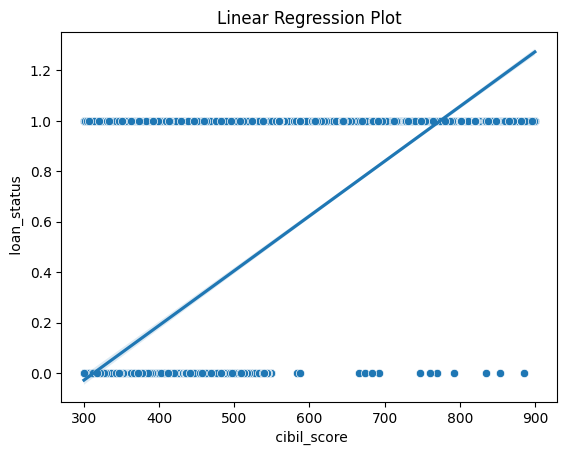

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=' cibil_score', y=' loan_status', data=df)

# Add a linear regression line using Seaborn
sns.regplot(x=' cibil_score', y=' loan_status', data=df, scatter=False)

# Customize the plot (if needed)
plt.title('Linear Regression Plot')
plt.xlabel(' cibil_score')
plt.ylabel(' loan_status')

# Show the plot
plt.show()


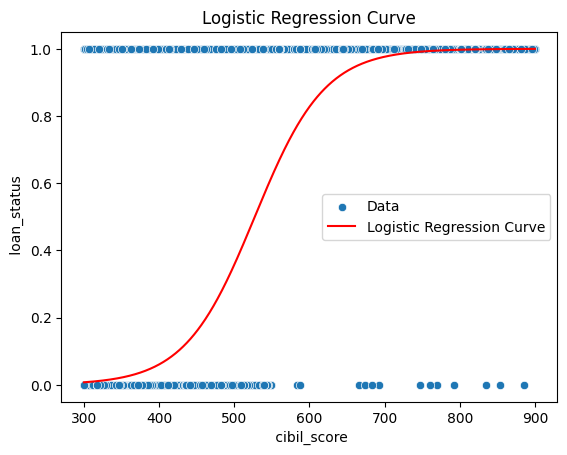

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

x = df[' cibil_score']
y = df[' loan_status']

# Reshape 'x' if it's a 1D array
x = x.values.reshape(-1, 1)

# Create a logistic regression model and fit it to the data
model = LogisticRegression()
model.fit(x, y)

# Create a range of values for your independent variable
x_values = np.linspace(min(x), max(x), 1000).reshape(-1, 1)

# Generate prediction probabilities for each value in the range
y_probabilities = model.predict_proba(x_values)[:, 1]


# Create a scatter plot of the data
sns.scatterplot(x=' cibil_score', y=' loan_status', data=df, label='Data')

# Plot the logistic regression curve
plt.plot(x_values, y_probabilities, color='red', label='Logistic Regression Curve')

# Set plot labels and title
plt.xlabel(' cibil_score')
plt.ylabel(' loan_status')
plt.title('Logistic Regression Curve')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [46]:
X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)

(3415, 12)
(854, 12)


In [47]:
model1 = LogisticRegression(max_iter=1000,random_state=0).fit(X_train, y_train)
print('Intercept:', model1.intercept_)
print('Coefficients:', model1.coef_)
print('Accuracy:',model1.score(X_test,y_test))

Intercept: [1.1793257e-06]
Coefficients: [[-4.73201687e-04  1.82574568e-06  4.73017307e-07  6.56852427e-07
  -4.84426588e-07  6.16874564e-08 -1.01943494e-05  5.63993873e-03
  -1.57768798e-09  1.92443031e-08  2.42741136e-09  1.39588304e-08]]
Accuracy: 0.734192037470726


In [48]:
preds = model1.predict(X_test)
confmtrx = np.array(confusion_matrix(y_test, preds))
confusion = pd.DataFrame(confmtrx, index=['approved', 'not_approved'],
columns=['predicted_approved', 'predicted_not_approved'])
confusion

,predicted_approved,predicted_not_approved
approved,143,181
not_approved,46,484


In [49]:
oddsratio = pd.DataFrame({ 'Variable':X.columns.tolist(),'Odds_ratio': (np.exp(model1.coef_).T).round(2).flatten().tolist()})
oddsratio


,Variable,Odds_ratio
0,loan_id,1.00
1,no_of_dependents,1.00
2,education,1.00
3,self_employed,1.00
4,income_annum,1.00
5,loan_amount,1.00
6,loan_term,1.00
7,cibil_score,1.01
8,residential_assets_value,1.00
9,commercial_assets_value,1.00


In [50]:
logit_model=sm.Logit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
print(stats1)

Optimization terminated successfully.
         Current function value: 0.220321
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 3415
Model:                          Logit   Df Residuals:                     3402
Method:                           MLE   Df Model:                           12
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.6676
Time:                        12:38:17   Log-Likelihood:                -752.40
converged:                       True   LL-Null:                       -2263.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -11.4673      0.507    -22.623      0.000     -12.

# Part 2 Logistic Regression with Standard scaling


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [53]:
model2 = LogisticRegression(max_iter=1000,random_state=0).fit(X_train_scaled, y_train)
preds2 = model2.predict(X_test_scaled)

print('Intercept:', model2.intercept_)
print('Coefficients:', model2.coef_)
print('Accuracy:',model2.score(X_test_scaled,y_test))

Intercept: [1.75751045]
Coefficients: [[ 0.07402589 -0.06097675  0.05242613  0.07950697 -1.69057844  1.24485636
  -0.84446521  4.15188686  0.02666236  0.09048744  0.26170811  0.16943868]]
Accuracy: 0.9262295081967213


In [54]:
preds = model1.predict(X_test_scaled)
confmtrx = np.array(confusion_matrix(y_test, preds))
confusion = pd.DataFrame(confmtrx, index=['approved', 'not_approved'],
columns=['predicted_approved', 'predicted_not_approved'])
confusion

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,predicted_approved,predicted_not_approved
approved,321,3
not_approved,111,419


In [55]:
oddsratio = pd.DataFrame({ 'Variable':X.columns.tolist(),'Odds_ratio': (np.exp(model2.coef_).T).round(2).flatten().tolist()})
oddsratio

,Variable,Odds_ratio
0,loan_id,1.08
1,no_of_dependents,0.94
2,education,1.05
3,self_employed,1.08
4,income_annum,0.18
5,loan_amount,3.47
6,loan_term,0.43
7,cibil_score,63.55
8,residential_assets_value,1.03
9,commercial_assets_value,1.09


In [56]:
logit_model=sm.Logit(y_train,sm.add_constant(X_train_scaled))
logit_model
result=logit_model.fit()
stats1=result.summary()
print(stats1)

Optimization terminated successfully.
         Current function value: 0.220321
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 3415
Model:                          Logit   Df Residuals:                     3402
Method:                           MLE   Df Model:                           12
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.6676
Time:                        12:41:39   Log-Likelihood:                -752.40
converged:                       True   LL-Null:                       -2263.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8119      0.094     19.205      0.000       1.627       1.997
x1             0.0777      0.